In [1]:
import pandas as pd
import numpy as np

file_path = ('D:/research_data/drive-download-20231111T180115Z-002/data1/GGL_los_8_0_0_1_2_N_4096_ang_4_SA_galaxies_on_plane_27_to_63.images.txt')
df = pd.read_csv(file_path, sep='\t')

mass_threshold = 1.43e13
massive_objects = df[df['M_Halo[M_sol/h]'] > mass_threshold]

# Display the table of massive objects
print(massive_objects)



                  GalID           HaloID       SubhaloID  Type  PlaneNumber  \
33      131026309036351  131026309011458  39013100000149     1           39   
37      131026309056670  131026309020070  39013100000128     2           39   
39      131003555021495  131003555009285  39012400000722     1           39   
43      131026309088615  131026309034834  39013100000131     1           39   
65      131003555018542  131003555008199  39012400000721     2           39   
...                 ...              ...             ...   ...          ...   
344299  359000103004504  359000103008086  38035900000143     1           38   
344300  359000103026118  359000103008953  38035900000108     1           38   
344302  359000103004705  359000103008056  38035900000159     1           38   
344303  359000103004275  359000103007832  38035900000098     2           38   
344304  359000103028935  359000103010574  38035900000104     1           38   

         z_spec  pos_0[rad]  pos_1[rad]  Dc_los[Mpc

In [2]:
# Finding the maximum and minimum values for pos_0[rad] and pos_1[rad]
max_pos_0 = df['pos_0[rad]'].max()
min_pos_0 = df['pos_0[rad]'].min()
max_pos_1 = df['pos_1[rad]'].max()
min_pos_1 = df['pos_1[rad]'].min()

# Printing the results
print("Maximum value of pos_0[rad]:", max_pos_0)
print("Minimum value of pos_0[rad]:", min_pos_0)
print("Maximum value of pos_1[rad]:", max_pos_1)
print("Minimum value of pos_1[rad]:", min_pos_1)

Maximum value of pos_0[rad]: -2.16085e-08
Minimum value of pos_0[rad]: -0.0174533
Maximum value of pos_1[rad]: 0.0174532
Minimum value of pos_1[rad]: 6.95811e-08


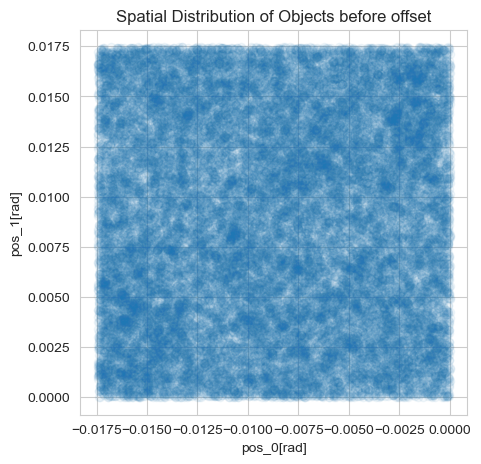

In [3]:
import matplotlib.pyplot as plt

df_sample = df.sample(frac=0.10)

# Create a scatter plot
plt.figure(figsize=(5, 5))
plt.scatter(df_sample['pos_0[rad]'], df_sample['pos_1[rad]'], alpha=0.05)
plt.xlabel('pos_0[rad]')
plt.ylabel('pos_1[rad]')
plt.title('Spatial Distribution of Objects before offset')
plt.grid(True)
plt.show()

In [4]:
# Function to convert square degrees to square radians
def sq_deg_to_sq_rad(sq_deg):
    return sq_deg * (np.pi / 180) ** 2

# Function to calculate the radius from the area
def radius_from_area(area):
    return np.sqrt(area / np.pi)

# Convert the area from square degrees to square radians
area_in_sq_rad = sq_deg_to_sq_rad(0.00082)

# Calculate the radius of the circle
radius = radius_from_area(area_in_sq_rad)
print(f"Radius: {radius} rad")

Radius: 0.00028197418977978086 rad


In [5]:
# Selecting objects within the specified area
selected_objects = df[df.apply(lambda row: np.sqrt(row['pos_0[rad]']**2 + row['pos_1[rad]']**2) <= radius, axis=1)]

# Displaying the results
print(f"Radius: {radius}")
print(f"Number of selected objects: {len(selected_objects)}")
selected_objects.head()  # Display the first few rows of the selected objects

Radius: 0.00028197418977978086
Number of selected objects: 81


,GalID,HaloID,SubhaloID,Type,PlaneNumber,z_spec,pos_0[rad],pos_1[rad],Dc_los[Mpc/h],M_Halo[M_sol/h],M_Subhalo[M_sol/h],M_Stellar[M_sol/h],mag_SDSS_u,mag_SDSS_g,mag_SDSS_r,mag_SDSS_i,mag_SDSS_z,mag_J,mag_H,mag_K
3941,480003343000020,480003343000020,43048000010964,0,43,0.794252,-0.000074,0.000128,1990.22,9.467220e+10,9.467220e+10,2.026710e+09,25.7022,25.5031,24.9782,24.1974,23.7930,23.3796,23.0580,22.9054
3947,480000058014167,480000058006487,43048000007581,0,43,0.797158,-0.000200,0.000005,2001.85,1.884840e+11,1.884840e+11,2.596100e+09,24.5796,24.3942,23.8547,22.9991,22.6506,22.3435,22.1318,22.0785
4045,480000082001244,480000082001640,43048000018949,0,43,0.789191,-0.000156,0.000051,1976.56,2.926230e+10,2.926230e+10,7.248540e+07,26.4278,26.4582,26.3266,25.6201,25.4742,25.4133,25.3588,25.4627
4046,480000058022872,480000058010971,43048000005312,1,43,0.796972,-0.000075,0.000062,1996.43,3.322130e+11,7.831980e+10,1.201360e+09,26.4838,26.2173,25.3862,24.3881,23.9690,23.6175,23.3875,23.3015
4048,30000457000020,30000457000020,43002900007787,0,43,0.866058,-0.000084,0.000096,2133.49,6.713120e+10,6.713120e+10,1.290850e+09,24.8351,24.6787,24.3042,23.5232,23.2962,23.1113,22.9446,22.9271


In [6]:
from astropy.table import Table
import pandas as pd
import numpy as np

# Assuming 'selected_objects' is already created from your previous steps
# Filter the required columns
filtered_data = selected_objects[['z_spec', 'M_Halo[M_sol/h]', 'pos_0[rad]', 'pos_1[rad]']]

# Convert the filtered DataFrame to an Astropy Table
astropy_table = Table.from_pandas(filtered_data)

# Add custom headers/labels if needed
# For example, to rename the columns:
astropy_table.rename_column('z_spec', 'Redshift')
astropy_table.rename_column('M_Halo[M_sol/h]', 'Halo Mass')
astropy_table.rename_column('pos_0[rad]', 'Position 0')
astropy_table.rename_column('pos_1[rad]', 'Position 1')

center_point = (0.0, 0.0)  # Replace with your actual center point
astropy_table.meta['Center_Point'] = center_point

# Display the table
print(astropy_table)
print("Metadata:", astropy_table.meta)

# If you need to save this table to a file, you can do so in various formats, e.g., CSV, FITS
# astropy_table.write('output_file.csv', format='csv')


Redshift    Halo Mass     Position 0   Position 1
-------- --------------- ------------ -----------
0.794252   94672200000.0 -7.37461e-05 0.000128456
0.797158  188484000000.0 -0.000199871 5.27351e-06
0.789191   29262300000.0 -0.000155829 5.05233e-05
0.796972  332213000000.0 -7.51715e-05 6.18089e-05
0.866058   67131200000.0 -8.37346e-05 9.58035e-05
0.866054   59385300000.0 -0.000112706 3.25857e-05
0.645546 2125820000000.0 -0.000173263 3.10776e-05
 0.64513 2125820000000.0 -0.000171715 3.04541e-05
0.645956 2125820000000.0 -0.000170037 8.84238e-05
 0.64481 2125820000000.0 -0.000127178 7.23806e-05
     ...             ...          ...         ...
 2.59383  124795000000.0 -3.93836e-05 0.000173449
 2.47511   54221400000.0  -0.00017677 1.76364e-05
 1.61531  197090000000.0 -3.47086e-05 0.000170152
 1.61257  541353000000.0 -0.000264592 2.26782e-05
 1.61242  658402000000.0 -0.000213051 7.55679e-06
 1.67943 1283240000000.0 -9.29832e-05 0.000108526
 1.60293  640329000000.0 -8.80795e-05  0.00025108


In [7]:
from slsim.Halos.read_millennium import ReadMS
from slsim.Halos.ms_halos_lens import HalosMSLens
from astropy.cosmology import default_cosmology

cosmology= default_cosmology.get()
ReadMS = ReadMS( file_path='D:/research_data/drive-download-20231111T180115Z-002/data1/GGL_los_8_0_0_1_2_N_4096_ang_4_SA_galaxies_on_plane_27_to_63.images.txt',
            selecting_area=0.00082,
            z_source=5,
            cosmo=None,
            sample_size=1,)
tables=ReadMS.get_tables()
print(tables)


[<Table length=278>
   z          mass               px                  py        
float64     float64           float64             float64      
-------- -------------- ------------------- -------------------
  0.8359  26204447360.0  -17.05092656091482   41.31917750584021
0.829382  25622097740.0   -40.0680162900283   20.96084112925176
0.837293  74536962400.0 -24.101057638440572 -42.176816062984464
0.789852  27369078940.0  -56.31343243004973  -4.244718194143289
0.837261  17469609020.0   4.458367434532386  24.714860602948807
0.793938 110058462400.0    5.71039480845216   8.234302583805999
0.794594  59396684200.0  -35.87671542708732 -14.413573142125218
0.838947  39015462400.0  -35.57144351384164  16.753039081810936
0.855797  29115992480.0  -40.21858959858868  -26.78946151695085
0.838054  24457466160.0   44.19528235803549  21.455876664244716
     ...            ...                 ...                 ...
  1.2613  71625552600.0   33.03635634006747   40.86539493209643
 1.24541 25098003380

In [8]:
from slsim.Halos.ms_calculating import calculate_kappa_gamma_with_muiltprocessing,kappa_gamma_from_files
from astropy.cosmology import default_cosmology

cosmology= default_cosmology.get()

all_kappa, all_gamma=   kappa_gamma_from_files(file_path='D:/research_data/drive-download-20231111T180115Z-002',
                                               selecting_area=0.00082,
                                               z_source=20,
                                               cosmo=cosmology,
                                               sample_size=5,
                                               gamma12=False,
                                               diff=0.000001,
                                               diff_method="square")

Processing files:   0%|          | 0/24 [00:00<?, ?it/s]

In [9]:
print(all_kappa, all_gamma)

[0.2835169730097675, 0.15157284560807227, 0.11818026568466422, 0.7301639075585342, 0.5205053965062767, 0.14168725204211086, 0.13333093534795282, 0.34193015330252763, 0.22194124265489945, 0.2465878926605214, 1.0051768751795365, 0.25043084739273525, 0.978678428742441, 0.6146295933595614, 0.2454545433815125, 0.17696538797545847, 0.5488909398110309, 0.15744710465948053, 0.6896045535165207, 0.3080324245674504, 0.3871739705785249, 0.5371318956802484, 0.12498007900818564, 0.4310340355195841, 0.84713241543799, 1.2955805082093264, 0.4483254587572816, 0.18296227499367546, 0.48453637377376957, 0.7136409304608904, 0.2874074138126126, 0.10905157443730218, 0.1690232138557013, 0.4415768962151567, 0.22483895056879533, 0.7267403062671818, 0.11060973467702517, 1.7542458180946907, 0.4172334036045555, 0.29492418786303265, 0.7458041748065192, 1.0838768619014783, 0.4400062427745155, 0.6379692973901285, 0.4323258211424985, 0.2595956021256285, 1.3515157779586673, 0.3607019358753405, 0.942432567097029, 0.35492

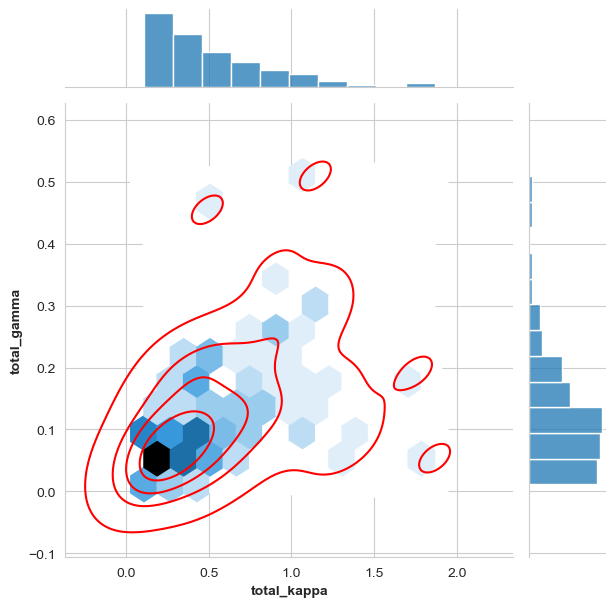

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

all_kappa_flat = np.concatenate(all_kappa) if isinstance(all_kappa[0], np.ndarray) else np.hstack(all_kappa)
all_gamma_flat = np.concatenate(all_gamma) if isinstance(all_gamma[0], np.ndarray) else np.hstack(all_gamma)

# Apply the condition all_kappa_flat < 2
filtered_kappa = all_kappa_flat[all_kappa_flat < 2]
filtered_gamma = all_gamma_flat[all_kappa_flat < 2]

# Create the joint plot
filtered_plot = sns.jointplot(x=filtered_kappa, y=filtered_gamma, kind='hex')
filtered_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
filtered_plot.ax_joint.set_xlabel('total_kappa', fontweight='bold')
filtered_plot.ax_joint.set_ylabel('total_gamma', fontweight='bold')
plt.show() 

In [16]:
from slsim.Halos.ms_calculating import get_halos_mass_with_muiltprocessing,get_mass_z_from_files

ms_all_masses, ms_all_zs, ms_number = get_mass_z_from_files(file_path='D:/research_data/drive-download-20231111T180115Z-002', 
                                                            selecting_area=0.00082, z_source=2.0, cosmo=None, mass_cut=1e12, sample_size=20)
print(len(ms_all_masses), len(ms_all_zs),  len(ms_number))

Processing files:   0%|          | 0/24 [00:00<?, ?it/s]

11658 11658 480


In [17]:
import numpy as np

np.save('ms_all_masses.npy', ms_all_masses)
np.save('ms_all_zs.npy', ms_all_zs)
np.save('ms_number.npy', ms_number)

In [1]:
import numpy as np
ms_all_masses = np.load('ms_all_masses.npy')
ms_all_zs = np.load('all_zs_rendering.npy')
ms_number = np.load('all_lengths_rendering.npy')

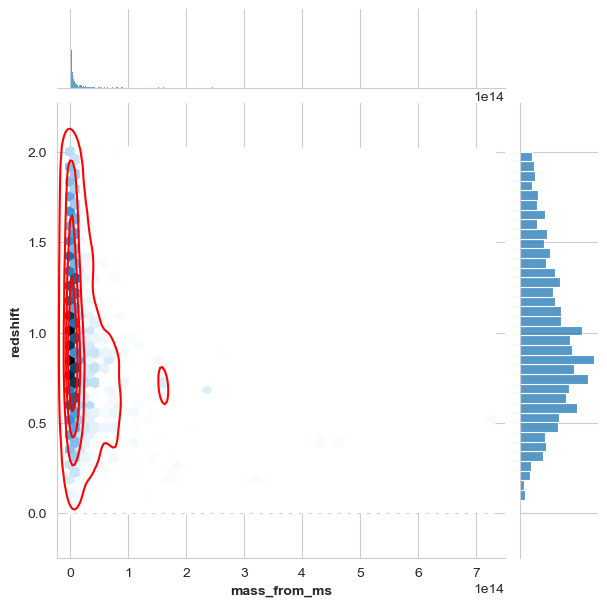

[26, 25, 14, 15, 28, 22, 19, 24, 15, 25, 34, 10, 25, 11, 19, 30, 31, 39, 28, 25, 17, 50, 11, 14, 29, 44, 11, 15, 15, 8, 13, 11, 18, 41, 38, 17, 13, 43, 31, 20, 11, 30, 11, 19, 8, 11, 54, 24, 10, 32, 19, 21, 18, 38, 44, 14, 24, 18, 45, 19, 23, 26, 28, 16, 15, 13, 25, 15, 18, 16, 28, 9, 22, 14, 32, 10, 30, 16, 26, 18, 11, 11, 28, 29, 38, 17, 8, 17, 10, 17, 33, 42, 13, 17, 23, 9, 15, 25, 20, 16, 18, 68, 18, 25, 28, 20, 13, 14, 23, 41, 21, 35, 13, 27, 11, 28, 3, 38, 38, 19, 24, 22, 5, 20, 28, 37, 22, 13, 30, 20, 14, 34, 14, 17, 14, 13, 21, 29, 22, 22, 30, 19, 30, 22, 42, 13, 22, 24, 18, 24, 20, 32, 18, 26, 9, 28, 27, 36, 27, 33, 14, 17, 31, 27, 53, 24, 20, 22, 22, 15, 18, 21, 31, 14, 24, 23, 27, 19, 29, 14, 19, 47, 21, 30, 32, 10, 52, 31, 22, 31, 18, 33, 20, 21, 14, 21, 36, 52, 18, 15, 30, 17, 17, 23, 9, 36, 29, 34, 20, 13, 23, 20, 48, 23, 12, 20, 35, 18, 19, 35, 17, 7, 47, 11, 10, 36, 15, 29, 20, 30, 13, 12, 8, 32, 6, 30, 18, 47, 15, 14, 22, 8, 20, 13, 18, 18, 12, 25, 19, 27, 22, 42, 32, 

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create the joint plot
plot_ms_halos = sns.jointplot(x=ms_all_masses, y=ms_all_zs, kind='hex')
plot_ms_halos.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
plot_ms_halos.ax_joint.set_xlabel('mass_from_ms', fontweight='bold')
plot_ms_halos.ax_joint.set_ylabel('redshift', fontweight='bold')
plt.show()

print(ms_number)

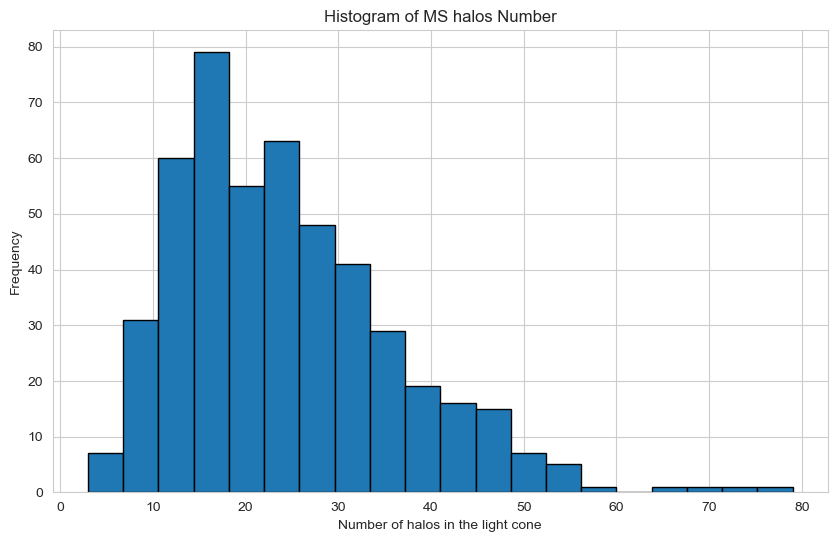

In [19]:
plt.figure(figsize=(10, 6)) 
plt.hist(ms_number, bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of MS halos Number')
plt.xlabel('Number of halos in the light cone')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [20]:
from slsim.Halos.halos_plus_glass import run_halos_by_multiprocessing


all_masses_rendering, all_zs_rendering, all_lengths_rendering = run_halos_by_multiprocessing(m_min_str='1.0E+12',
                                                m_max_str='1.0E+16',
                                                m_min=1e12,
                                                m_max=1e16,
                                                z_max=2.0,
                                                n_iterations=480,                                               
                                                sky_area=0.00082)
print( all_masses_rendering, all_zs_rendering, all_lengths_rendering)


The 480 halo-lists took 665.1576223373413 seconds to run
[8674237480207.0, 9820558998614.092, 5032559196153.147, 6812137622354.619, 8641720931068.553, 2063004074006.5613, 1875500128788.307, 11564231193989.096, 1289954100205.202, 1084817120699.6569, 1148662347009.8242, 6391092176407.727, 1684130902519.0225, 1998635733390.6553, 4406354414037.98, 3873384905246.13, 11114825360867.496, 1272808614925.94, 1740126776619.7664, 1132502936711.0857, 1049203804041.1233, 1847212973678.4607, 15815483799740.625, 3751739877781.711, 5138112611840.421, 1487987082163.9329, 2109899369197.2996, 5793458956645.835, 15089324594493.885, 2136622449989.8625, 7255233710253.26, 1275035443143.387, 7096962186577.579, 4898600617704.2, 2242753060083.8633, 1131916410299.4111, 1905709009552.9207, 4447570402834.842, 1104204023377.5525, 2939619065294.222, 5548386639416.26, 1004755997070.3798, 1039536968574.5122, 1117144217758.4717, 1095072415470.9689, 4657975183250.962, 48254004962783.33, 6505164341960.857, 1152925949717.0

In [6]:
np.save('all_masses_rendering.npy', all_masses_rendering)
np.save('all_zs_rendering.npy', all_zs_rendering)
np.save('all_lengths_rendering.npy', all_lengths_rendering)

In [ ]:
all_masses_rendering_loaded = np.load('all_masses_rendering.npy')
all_zs_rendering_loaded = np.load('all_zs_rendering.npy')
all_lengths_rendering_loaded = np.load('all_lengths_rendering.npy')

In [21]:
print(len(ms_all_zs),len(ms_all_masses),len(all_masses_rendering))

11658 11658 9650


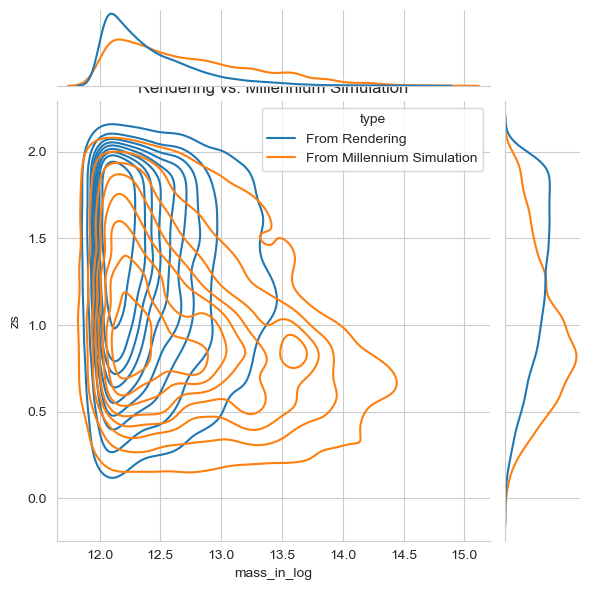

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# 您之前的代码，用于创建 df1 和 df2
log_all_masses_rendering = np.log10(all_masses_rendering)
log_ms_all_masses = np.log10(ms_all_masses)
df1 = pd.DataFrame({'mass_in_log': log_all_masses_rendering, 'zs': all_zs_rendering, 'type': 'From Rendering'})
df2 = pd.DataFrame({'mass_in_log': log_ms_all_masses, 'zs': ms_all_zs, 'type': 'From Millennium Simulation'})

# 重置索引
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

# 合并 DataFrame
df_total = pd.concat([df1, df2], axis=0)

# 绘图
sns.jointplot(data=df_total, x="mass_in_log", y="zs", hue="type", kind="kde")
plt.title('Rendering vs. Millennium Simulation')
plt.show()

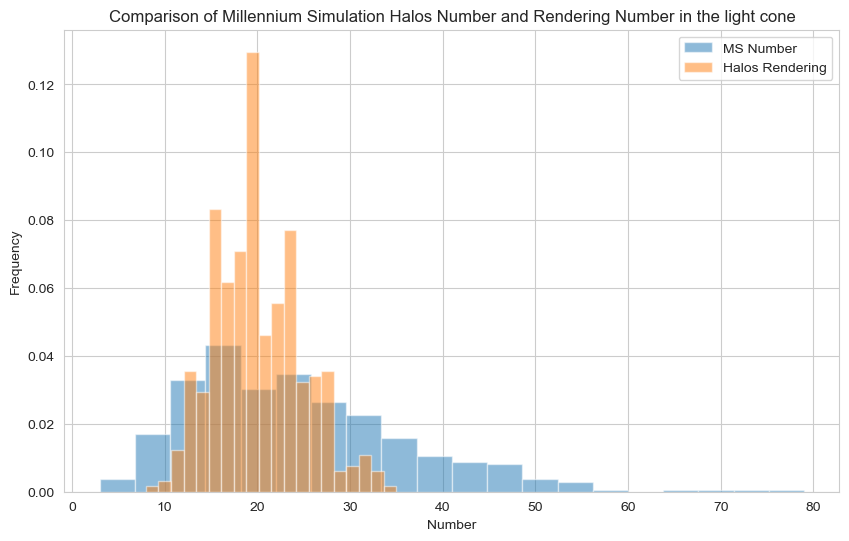

In [25]:
plt.figure(figsize=(10, 6))

# Plot the histograms
plt.hist(ms_number, bins=20, alpha=0.5, density=True, label='MS Number')
plt.hist(all_lengths_rendering, bins=20, alpha=0.5, density=True, label='Halos Rendering')

plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Comparison of Millennium Simulation Halos Number and Rendering Number in the light cone')
plt.legend()  
plt.show()